## Autocorrelations (acf) - v2 - using default plot of statsmodels
Instead of a custom graph of plotly

Following the same logic using with plotly, the return of the function is the figure

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('/')[:-1]
root_path = '/'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  /Users/joseortega/Documents/GitHub/exploratory-data-analysis-ds


### 0. Package and load data
**Dataset: Tensorflow climate**

In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [3]:
# get data
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

# read data
data = pd.read_csv(csv_path)

# transform index into datetime format
index_datetime = pd.to_datetime(data.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

# set datetime as index
data.set_index(index_datetime, inplace =  True)

In [4]:
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
# sampling to example
data = data[0:1000]

In [6]:
data.shape

(1000, 14)

## ACF. Función de autocorrelación
Qué es:

- En términos simples, nos dice si la serie de tiempo se parece a sí misma, en términos estadísticos, cuando se le retrasa en el tiempo.

- En otras palabras, indica qué tanto depende (linealmente) lo qué pasará con los valores en un momento dado de lo que pasaba con ellos en un tiempo anterior.

- Se entiende que es una medida de “memoria” del proceso subyacente, y es por esto que es una buena herramienta para juzgar aleatoriedad y estacionariedad

- Se puede utilizar e**l método serie.a**utocorr() que calcular la autocorrelación con un. This method computes the Pearson correlation between the Series and its shifted self. lag de 1


```
Autocorrelación(k) = Cov(X_t, X_{t-k}) / (std(X_t) * std(X_{t-k}))

X_t es el valor de la serie temporal en el tiempo t.
X_{t-k} es el valor de la serie temporal en el tiempo t-k (retraso de k periodos).
Cov(X_t, X_{t-k}) es la covarianza entre X_t y X_{t-k}.
std(X_t) es la desviación estándar de X_t.
std(X_{t-k}) es la desviación estándar de X_{t-k}.
```


## Individual acf

### 1. codes to generate EDA
Classic Plot of ACF
USING STATS MODELS:
- **plot_acf (plot acf)**

  tsaplots.plot_acf(data[feature_example], lags=40)

- **sm.tsa.acf (calculate acf)**

  sm.tsa.acf(dta.values.squeeze(), alpha=0.05, nlags = 40)

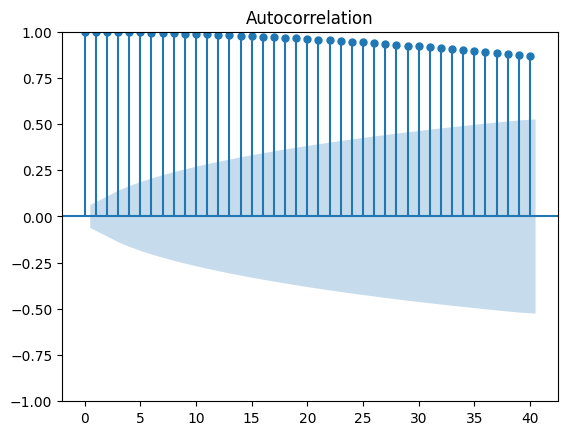

In [7]:
# Plotting autocorrelations - example - statsmodel
feature_example = data.columns.tolist()[0]

fig = tsaplots.plot_acf(data[feature_example], lags=40)
plt.show()

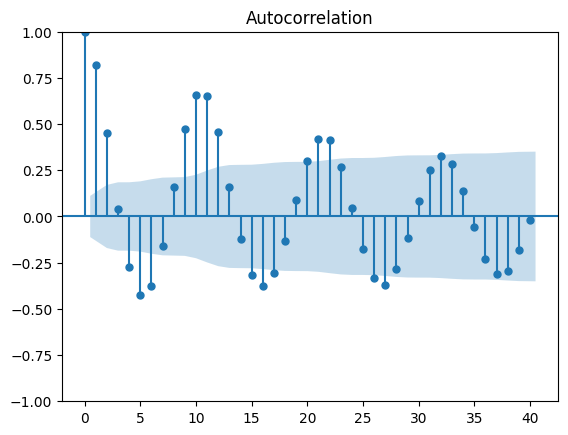

In [8]:
# example
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
plt.show()

In [9]:
acf, confint = sm.tsa.acf(dta.values.squeeze(), alpha=0.05, nlags = 40)

In [10]:
acf

array([ 1.        ,  0.82020129,  0.45126849,  0.03957655, -0.27579196,
       -0.42523943, -0.37659509, -0.15737391,  0.15820254,  0.47309753,
        0.65898002,  0.65029082,  0.45666254,  0.16179329, -0.12205105,
       -0.3161808 , -0.37471125, -0.30605753, -0.1348069 ,  0.09158727,
        0.2975632 ,  0.4207074 ,  0.41183954,  0.27020758,  0.04496208,
       -0.17428715, -0.33045026, -0.37287834, -0.28555061, -0.11794414,
        0.08293231,  0.24897507,  0.32752101,  0.28335919,  0.1375272 ,
       -0.05526386, -0.22973205, -0.31338879, -0.29355684, -0.17897285,
       -0.01769038])

In [11]:
confint

array([[ 1.        ,  1.        ],
       [ 0.70870284,  0.93169975],
       [ 0.28050977,  0.62202721],
       [-0.14541504,  0.22456814],
       [-0.46088878, -0.09069514],
       [-0.61537624, -0.23510263],
       [-0.57820881, -0.17498137],
       [-0.36755092,  0.05280309],
       [-0.05343433,  0.3698394 ],
       [ 0.25999554,  0.68619952],
       [ 0.43319803,  0.88476201],
       [ 0.40174559,  0.89883605],
       [ 0.18779623,  0.72552886],
       [-0.1165486 ,  0.44013519],
       [-0.40155968,  0.15745758],
       [-0.5963512 , -0.03601039],
       [-0.65928303, -0.09013947],
       [-0.59669852, -0.01541653],
       [-0.42942735,  0.15981356],
       [-0.20379902,  0.38697356],
       [ 0.00182408,  0.59330231],
       [ 0.12126932,  0.72014547],
       [ 0.10514111,  0.71853796],
       [-0.04329062,  0.58370577],
       [-0.2714182 ,  0.36134236],
       [-0.49074685,  0.14217256],
       [-0.64810103, -0.0127995 ],
       [-0.6947744 , -0.05098229],
       [-0.61277239,

### 2. Sintetize

In [12]:
def plot_individual_acf_stats(df, feature_plot, lags):
    """
    Plot the individual ACF of a feature of with x number of lags. 
    ->ACF generated by statsmodels

    Args
        df (dataframe): data. The index should be the timestamp
        feature_plot (string): name of the feature that will be ploted
        lags (int): Number of lags in the ACF

    Return
        fig (figure matplotlib): fig of matplotlib with the acf generated by statsmodels
    """
    fig = tsaplots.plot_acf(df[feature_plot], 
                            lags = lags)

    return fig

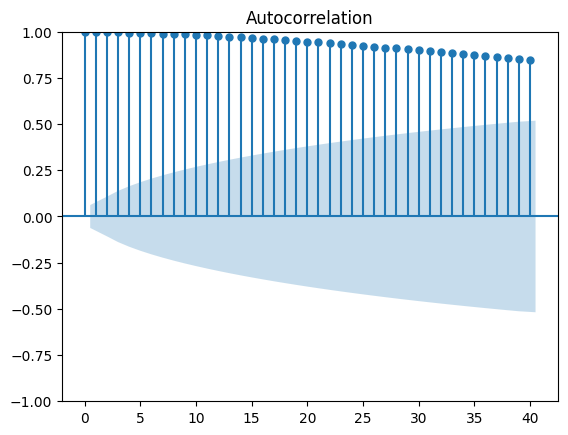

In [13]:
feature_ = data.columns.tolist()[3]

fig_acf_individual_stats = plot_individual_acf_stats(
    df = data, 
    feature_plot = feature_, 
    lags = 40
)

In [14]:
# save individual acf
dpi_value = 300
fig_acf_individual_stats.savefig("output_eda/2_univariate_analysis/acf_individual_stats.png", dpi = dpi_value)

## ACF all features
Make a subplot of all acf functions generated by statsmodels

In [15]:
def plot_all_acf_stats(df, lags, number_columns = 2):
    """
    Plot the individual ACF of ALL FEATURES of with x number of lags
    ->ACF generated by statsmodels

    Args
        df (dataframe): data. The index should be the timestamp
        lags (int): Number of lags in the ACF

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """

    ############################################################################
    # get list of features
    list_features = df.columns.tolist()
    
    
    # define number of rows with a number of columns fixed pass as parameter
    if (df.shape[1] % number_columns) != 0:
        number_rows = (df.shape[1] // number_columns) + 1 
    else:
        number_rows = (df.shape[1] // number_columns)

    
    # create subplots
    fig, axes = plt.subplots(nrows = number_rows, 
                             ncols = number_columns,
                             #figsize = (subplot_width * number_columns, subplot_height * number_rows),
                             figsize=(7*number_columns, 4*number_rows + 0),
                             tight_layout = True
                            )
    
    # add title
    #fig.suptitle("Plots of Autocorrelation", fontsize=28)  # sometimes the tittle is overlaped in the plots
    
    # add subplot for each of the features -> feature
    for index_feature, feature in enumerate(list_features):
        row = (index_feature // number_columns) #+ 1 # in matplotlib index starts in 0, in plolty starts in 1
        column = (index_feature % number_columns) #+ 1
    
        # subplot each feature
        tsaplots.plot_acf(df[feature], lags=lags, ax=axes[row, column])
        axes[row, column].set_title(f'ACF of "{feature}"')
    
    # adjust design
    plt.subplots_adjust(top=0.95) # sup title above the subplots
    
    ############################## 

    return fig

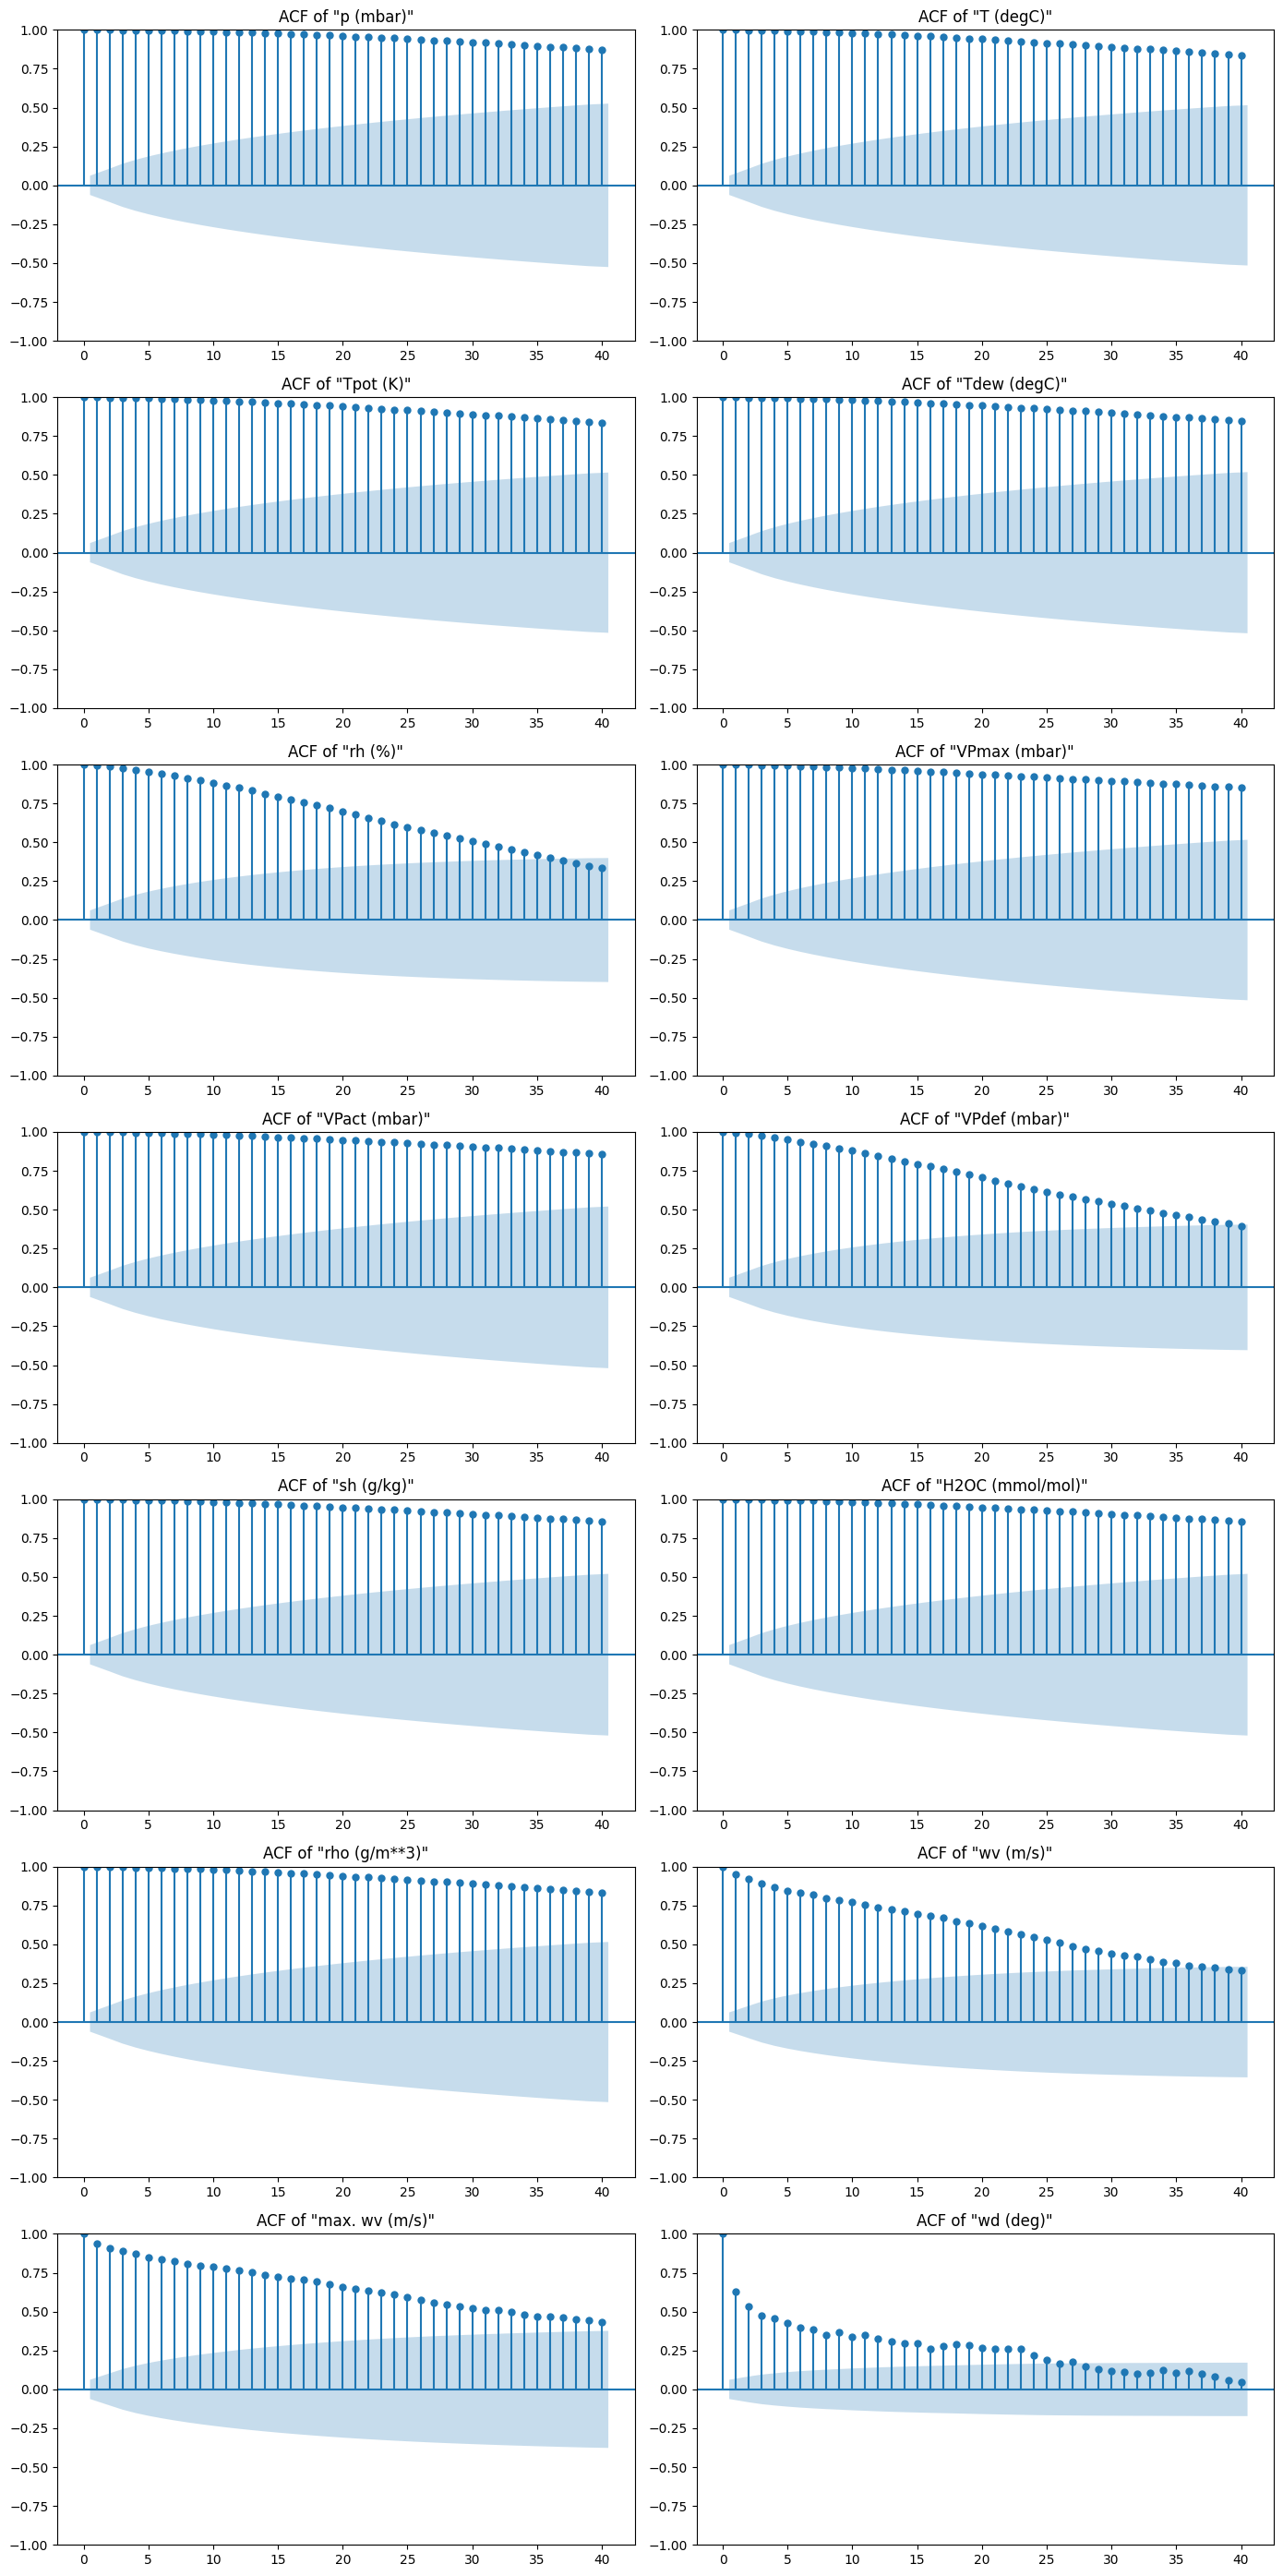

In [16]:
fig_acf_stats = plot_all_acf_stats(
    df = data, 
    lags = 40,
    number_columns = 2
)

In [17]:
# save figure acf
dpi_value = 300
fig_acf_stats.savefig("output_eda/2_univariate_analysis/acf_stats.png", dpi = dpi_value)